<a href="https://colab.research.google.com/github/haynes3/Neural-Networks/blob/main/David_Haynes_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
# Import CIFAR-10 dataset
cifar10 = tf.keras.datasets.cifar10
(train_xs, train_ys), (test_xs, test_ys) = cifar10.load_data()
class_names = ["Airplane","Automobile","Bird","Cat","Deer","Dog","Frog","Horse","Ship","Truck"]
# Printing the class names
for i, class_name in enumerate(class_names, start=0):
  print(f"Class {i}: {class_name}")

Class 0: Airplane
Class 1: Automobile
Class 2: Bird
Class 3: Cat
Class 4: Deer
Class 5: Dog
Class 6: Frog
Class 7: Horse
Class 8: Ship
Class 9: Truck


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

print(f"Number of training images: {train_xs.shape[0]}")
print(f"Number of test images: {test_xs.shape[0]}")
print(f"Image dimensions: {test_xs.shape[1]}x{train_xs.shape[2]}x{train_xs.shape[3]} (32x32 RGB images)")
print(f"Number of classes: {len(class_names)}")
print(f'Train data shape: {train_ys.shape}')
print(f'Test data shape: {test_ys.shape}')



Number of training images: 50000
Number of test images: 10000
Image dimensions: 32x32x3 (32x32 RGB images)
Number of classes: 10
Train data shape: (50000, 1)
Test data shape: (10000, 1)


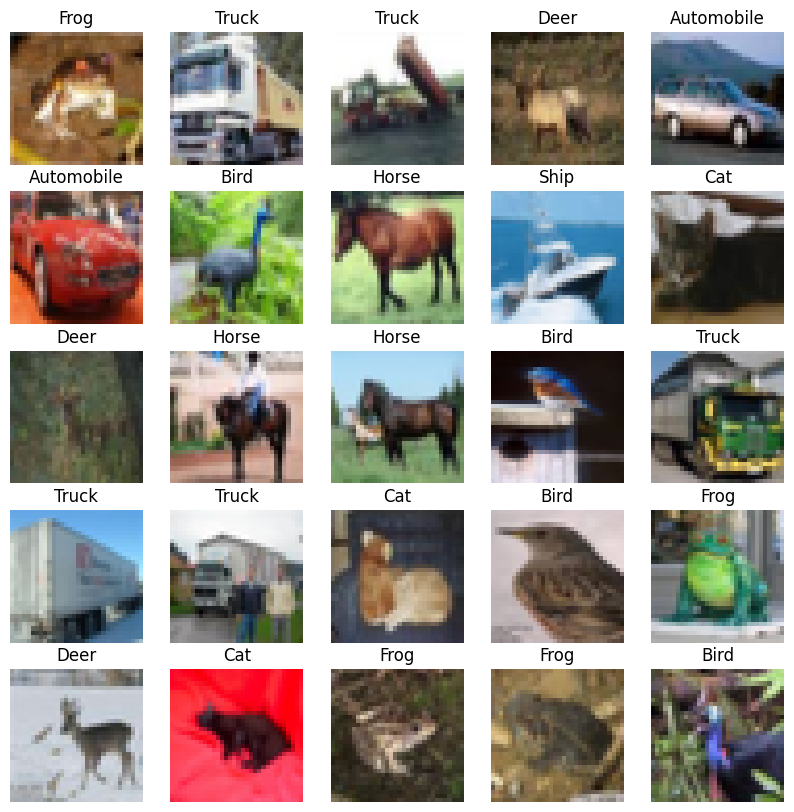

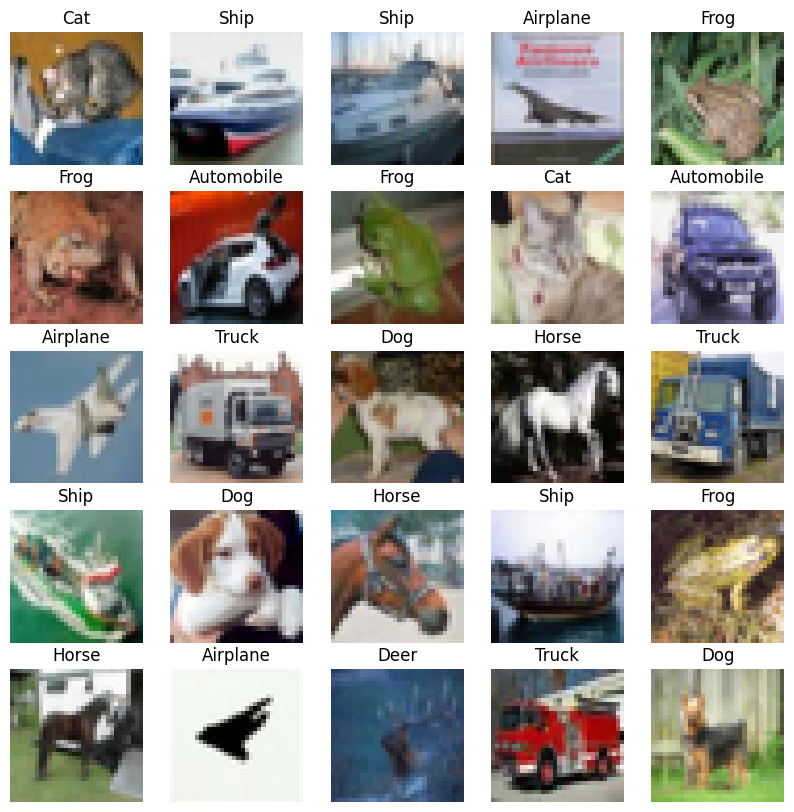

In [ ]:
def plot_images(images, labels, class_names):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i][0]])
        plt.axis('off')
    plt.show()

plot_images(train_xs[:25], train_ys[:25], class_names)

plot_images(test_xs[:25], test_ys[:25], class_names)


In [ ]:
train_xs, test_xs = train_xs / 255, test_xs / 255

In [ ]:
from tensorflow.keras import layers, models

ANN = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ANN.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
history_ann = ANN.fit(train_xs, train_ys, epochs=6, validation_data=(test_xs, test_ys))

Epoch 1/6
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.2830 - loss: 2.0082 - val_accuracy: 0.3876 - val_loss: 1.7030
Epoch 2/6
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.3975 - loss: 1.6772 - val_accuracy: 0.4347 - val_loss: 1.5935
Epoch 3/6
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4306 - loss: 1.5896 - val_accuracy: 0.4365 - val_loss: 1.5843
Epoch 4/6
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4490 - loss: 1.5407 - val_accuracy: 0.4485 - val_loss: 1.5283
Epoch 5/6
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4639 - loss: 1.5014 - val_accuracy: 0.4665 - val_loss: 1.4945
Epoch 6/6
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4722 - loss: 1.4699 - val_accuracy: 0.4655 - val_loss: 1.4901


In [ ]:
test_loss, test_accuracy = ANN.evaluate(test_xs, test_ys)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4580 - loss: 1.4919
Test loss: 1.4901434183120728
Test accuracy: 0.46549999713897705


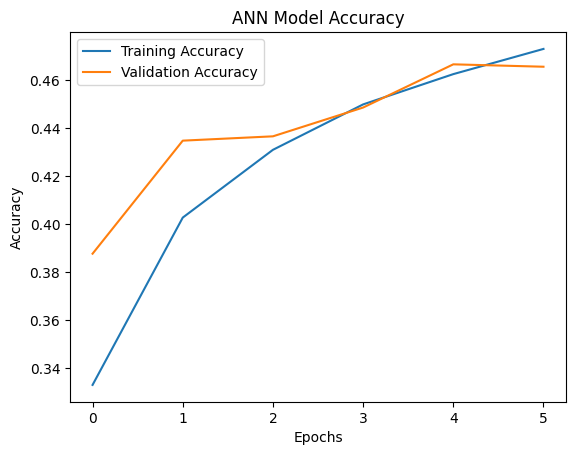

In [ ]:
plt.plot(history_ann.history['accuracy'], label='Training Accuracy')
plt.plot(history_ann.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('ANN Model Accuracy')
plt.legend()
plt.show()

In [ ]:
sample_image = test_xs[0].reshape(1, 32, 32, 3)
predicted_label = ANN.predict(sample_image)
predicted_class = class_names[np.argmax(predicted_label)]
print(f"Predicted class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
Predicted class: Cat


In [ ]:
CNN = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

CNN.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


In [ ]:
history_cnn = CNN.fit(train_xs, train_ys, epochs= 10, batch_size=64, validation_data=(test_xs, test_ys))


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3267 - loss: 1.8236 - val_accuracy: 0.5122 - val_loss: 1.3436
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5460 - loss: 1.2826 - val_accuracy: 0.5995 - val_loss: 1.1411
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6117 - loss: 1.1013 - val_accuracy: 0.6272 - val_loss: 1.0722
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6530 - loss: 0.9898 - val_accuracy: 0.6512 - val_loss: 0.9914
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6857 - loss: 0.9061 - val_accuracy: 0.6724 - val_loss: 0.9399
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7068 - loss: 0.8415 - val_accuracy: 0.6899 - val_loss: 0.8951
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7298 - loss: 0.7769 - val_accuracy: 0.6954 - val_loss: 0.8908
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7415 - loss: 0.7422 - val_accuracy: 0.

In [ ]:
test_loss, test_accuracy = CNN.evaluate(test_xs, test_ys)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7054 - loss: 0.8701
Test loss: 0.8810995221138
Test accuracy: 0.7042999863624573


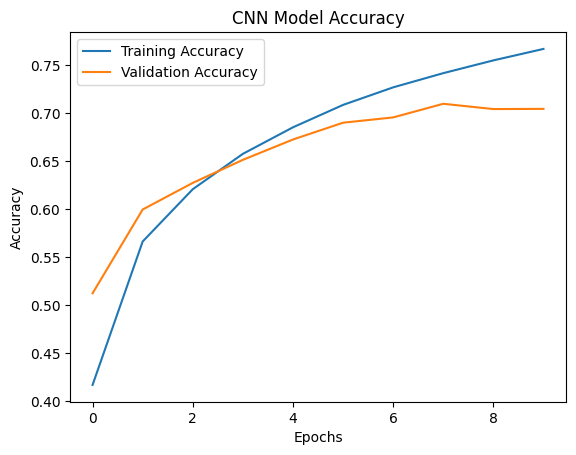

In [ ]:
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN Model Accuracy')
plt.legend()
plt.show()

In [ ]:
sample_image = test_xs[0].reshape(1, 32, 32, 3)
predicted_label = CNN.predict(sample_image)
predicted_class = class_names[np.argmax(predicted_label)]
print(f"Predicted class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
Predicted class: Cat
